In [1]:
import numpy as np
import sys
sys.path.insert(0,'..')
from Segment import *

from matplotlib import pyplot as plt

import pandas as pd

from Mdl import *
import time

from csv_to_mdl_pickle import *

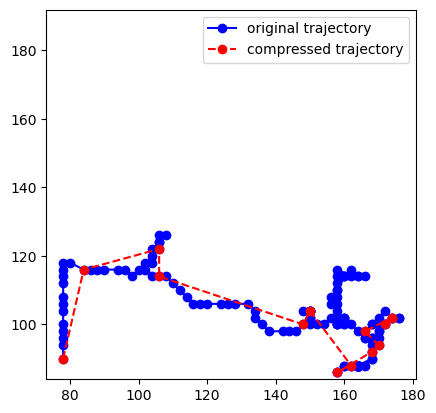

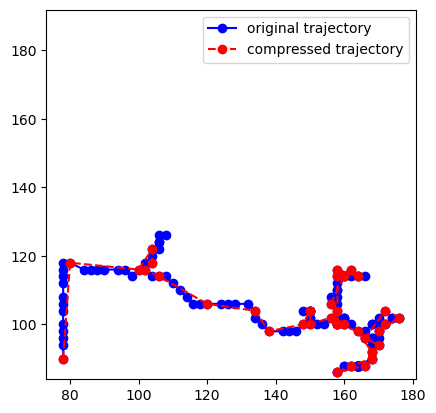

38

In [2]:
df = load_DF_pickle("./coordinatesV2/coord_test_with_mdl_pc.pkl").head(200)

dc = df.copy()[['x0','y0','pc0']]#.head(45)
x = dc.x0
y = dc.y0

pc_mdl = df.query("pc0 == True")

x_mdl = pc_mdl.x0
y_mdl = pc_mdl.y0
plt.plot(x, y, '-o', c='blue', label="original trajectory")

plt.plot(x_mdl, y_mdl, '--o', c='red', label="compressed trajectory")

plt.legend()

plt.axis('square')
plt.show()
#print(x_mdl.tolist())
len(x_mdl)

df = load_DF_pickle("./coordinates/coord_test_with_mdl_pc.pkl").head(200)

dc = df.copy()[['x0','y0','pc0']]#.head(45)
x = dc.x0
y = dc.y0

pc_mdl = df.query("pc0 == True")

x_mdl = pc_mdl.x0
y_mdl = pc_mdl.y0
plt.plot(x, y, '-o', c='blue', label="original trajectory")

plt.plot(x_mdl, y_mdl, '--o', c='red', label="compressed trajectory")

plt.legend()

plt.axis('square')
plt.show()
#print(x_mdl.tolist())
len(x_mdl)

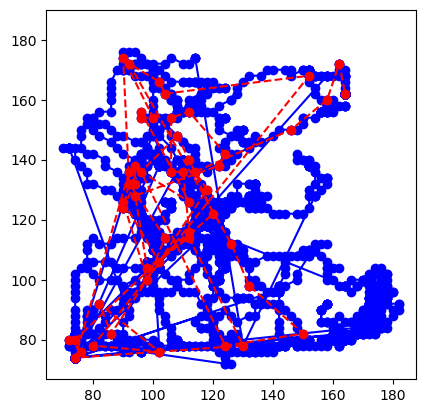

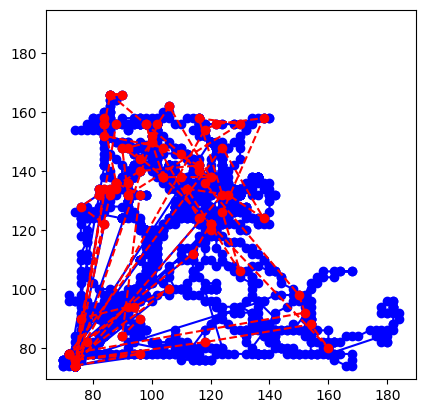

85

In [3]:
df = load_DF_pickle("./coordinatesV2/coord_3842910716_with_mdl_pc.pkl")

dc = df.copy()[['x0','y0','pc0']]#.head(45)
x = dc.x0
y = dc.y0

pc_mdl = df.query("pc0 == True")

x_mdl = pc_mdl.x0
y_mdl = pc_mdl.y0
plt.plot(x, y, '-o', c='blue')
plt.plot(x_mdl, y_mdl, '--o', c='red')

plt.axis('square')
plt.show()
#print(x_mdl.tolist())
len(x_mdl)

df = load_DF_pickle("./coordinatesV2/coord_4063286002_with_mdl_pc.pkl")

dc = df.copy()[['x0','y0','pc0']]#.head(45)
x = dc.x0
y = dc.y0

pc_mdl = df.query("pc0 == True")

x_mdl = pc_mdl.x0
y_mdl = pc_mdl.y0
plt.plot(x, y, '-o', c='blue')
plt.plot(x_mdl, y_mdl, '--o', c='red')

plt.axis('square')
plt.show()
#print(x_mdl.tolist())
len(x_mdl)

In [18]:
def get_segs(df):
    segs = []
    for i in range(10):
        pc_mdl = df.query( 'pc' + str(i) + ' == True' )
        #print('len MDL'+str(i), len(pc_mdl))
        #print(pc_mdl)
        point_maker = lambda x: Point(x['x'+str(i)], x['y'+str(i)])
        tmp = pc_mdl.apply(point_maker, axis=1).tolist()
        #print("leeeeeen tmp", len(tmp))
        for i in range(len(tmp)-1):
            segs.append( Segment(tmp[i], tmp[i+1]) )

    #print('segs of a game: ', len(segs))
    return segs

def process_games(l):
    res = []
    for i in l:
        
        d = load_DF_pickle(i)
        #print(d)
        #tmp = 0
        #for i in range(10):
        #    tmp += d['pc' + str(i)].value_counts()[True]
        #print("nb of pc tot game:", tmp)
        res.extend( get_segs(d))
        
    return res


In [20]:
l = list_dir_extension("./coordinatesV2/", "with_mdl_pc.pkl")
print(l[:1])
res = process_games(l[:1])
#res = res[:len(res)//4]
print("res: ", len(res))
#print(res)
titre = np.array(res)
np.save("../clustering/arr_segs_1_game.pkl", titre)

res = process_games(l)
print("res: ", len(res))
titre = np.array(res)
np.save("../clustering/arr_segs_10_game.pkl", titre)

['./coordinatesV2/coord_3842910716_with_mdl_pc.pkl']
res:  529
res:  13384


In [22]:
sys.path.insert(0,'../clustering/')
from KMedoid import KMedoid
from KMeansSegments import *
from AffinityPropagation import *

#a = KMedoid(res, 100)
#a = KMeansSegments(40, res)
a = AffinityPropagation(res, 200, 0.5)

In [23]:
#r = a.kMedoids()
#r = a.calculate()
r = a.start()

/home/linthora/Desktop/L3/projet/dota-project-collenot-danvy-lecoindre-toure/mdl/../Segment.py:102: RuntimeWarning: invalid value encountered in double_scalars
  u1 = np.sum(vect_siei * vect_sisj) / square_norm_vect_siei
/home/linthora/Desktop/L3/projet/dota-project-collenot-danvy-lecoindre-toure/mdl/../Segment.py:103: RuntimeWarning: invalid value encountered in double_scalars
  u2 = np.sum(vect_siei * vect_siej) / square_norm_vect_siei


[[  -0.           -2.82842712   -5.02487306 ...  -96.82836233
  -124.07692308  -92.63693041]
 [  -2.82842712   -0.           -2.75097859 ...  -95.19654078
  -119.01886792 -116.        ]
 [  -5.02487306   -2.75097859   -0.         ...  -93.53027709
   -70.58863894  -42.30533744]
 ...
 [ -96.82836233  -95.19654078  -93.53027709 ...   -0.
   -34.64214267  -21.16528225]
 [-124.07692308 -119.01886792  -70.58863894 ...  -34.64214267
    -0.           -4.        ]
 [ -92.63693041 -118.          -42.30533744 ...  -21.16528225
    -4.           -0.        ]]
Iteration:  1
Iteration:  2
Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Ite

In [24]:
len(a.clusters)
#print(a.representants)

115

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
21
22
23
24
25
26
27
28
29
30
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
54
55
57
59
61
62
63
64
65
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
85
87
90
91
92
94
96
97
99
100
101
102
103
104
105
106
107
108
109
110
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
131


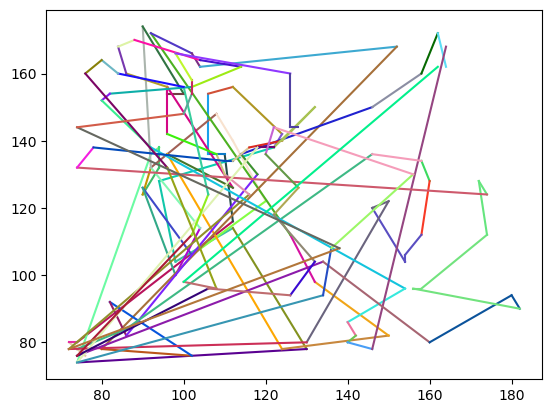

In [41]:

#for i in r[0]:
#    print(i)

#res = a.representants
centroids = a.representants
#centroids = a.calculate_centroids(res[1])

#for i in range(len(res[1])):
#for i in a.clusters:
#    print(i)
""" for i in range(len(centroids)):
        hexa = "#"
        for _ in range(6):
            hexa += random.choice("0123456789ABCDEF")

        for segment in a.clusters[i+1]:
            plt.plot([segment.get_p1().get_x(), segment.get_p2().get_x()], [segment.get_p1().get_y(), segment.get_p2().get_y()], linestyle="--", color=hexa)

        plt.plot([centroids[i].get_p1().get_x(), centroids[i].get_p2().get_x()], [centroids[i].get_p1().get_y(), centroids[i].get_p2().get_y()], 'bo', linestyle="-", color=hexa, linewidth=1.0)
 """

for i in a.clusters:
        hexa = "#"
        for _ in range(6):
            hexa += random.choice("0123456789ABCDEF")

        for segment in a.clusters[i]:
            plt.plot([segment.get_p1().get_x(), segment.get_p2().get_x()], [segment.get_p1().get_y(), segment.get_p2().get_y()], linestyle="-", color=hexa)

        #plt.plot([centroids[i].get_p1().get_x(), centroids[i].get_p2().get_x()], [centroids[i].get_p1().get_y(), centroids[i].get_p2().get_y()], 'bo', linestyle="-", color=hexa, linewidth=1.0)


plt.show()

NameError: name 't' is not defined

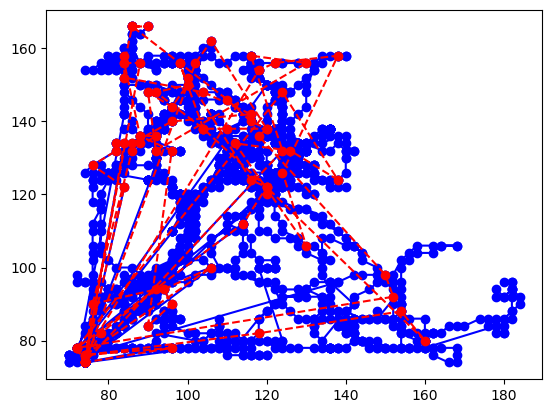

In [10]:
plt.plot(x, y, '-o', c='blue')
plt.plot(x_mdl, y_mdl, '--o', c='red')
plt.plot(t[:5, 0], t[:5,1], '--x', c='orange')
plt.axis('square')
plt.show()

In [ ]:
d = load_DF_pickle("./coordinates/coord_3841665963_with_mdl_pc.pkl")
traj_p1 = d[['x0', 'y0']].copy()

minX = traj_p1.x0.min()
minY = traj_p1.y0.min()

maxX = traj_p1.x0.max()
maxY = traj_p1.y0.max()

#traj_p1.x0 =  100 * (traj_p1.x0 - minX) / (maxX - minX)
#traj_p1.y0 =  100 * (traj_p1.y0 - minY) / (maxY - minY)

point_maker = lambda x: Point(x['x0'], x['y0'])
#print(traj_p1)
tmp = traj_p1.apply(point_maker, axis=1).tolist()

truc = MDL(tmp)
#tmp

In [ ]:
#traj2list = atp(List(tmp))
#pc = truc.atp()
pc, _ = atp(tmp)

In [ ]:
t = np.array(list(map(lambda x: x.get_tuple(),pc)))
len(t)
#print(t)

126

126  ---  2689


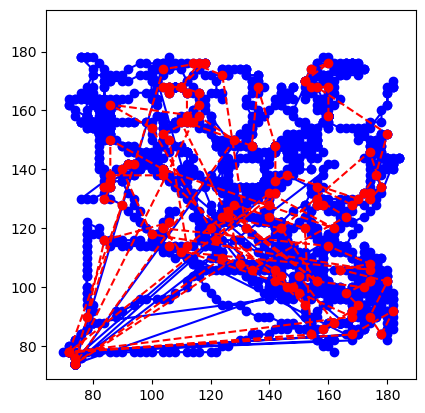

In [ ]:
#for i in pc:
#    print(i.get_tuple())

print(len(pc), " --- ", len(traj_p1))

plt.plot(traj_p1['x0'],traj_p1['y0'], '-o', c='blue')
plt.plot(t[:, 0], t[:,1], '--o', c='red')

plt.axis('square')
plt.show()

In [ ]:
from numba.typed import List
r = traj2list[0]

#traj2 = np.array(list(map(lambda x: x.get_tuple(),traj2list)))

NameError: name 'traj2list' is not defined